# <font color=darkcyan> Estimation de densités</font> 

#### <font color=darkcyan>Application à la détection de dauphins dans le Golfe de Gascogne</font>

Dans ce projet on s'intéresse à l'estimation d'une densité de probabilité $p_{\star}$ sur un espace $\mathsf{X} \subset \mathbb{R}^d$. On suppose que l'on dispose de variables $(X_i)_{1\leqslant i\leqslant n}$ indépendantes et identiquement distribuées et telles que la loi de $X_1$ admet la densité $p_\star$ par rapport à une mesure de référence sur $\mathsf{X}$.

Nous allons proposer, étudier et implémenter différents estimateurs de $p_\star$ à partir des $(X_i)_{1\leqslant i\leqslant n}$.

- **Estimateur à base d'histogrammes**.
- **Estimateurs à noyaux**.

Notons $\widehat{p}_n$ un estimateur de $p_\star$. La performance de cet estimateur est en générale mesurée à l'aide de deux critères.

``L'erreur quadratique moyenne`` est définie, pour tout $x\in \mathsf{X}$ par 

$$
\mathcal{E}(x) = \mathbb{E}\left[\left(\widehat{p}_n(x)-p_{\star}(x)\right)^2\right]\,.
$$

``L'erreur quadratique moyenne intégrée`` est définie par 

$$
\overline{\mathcal{E}} = \mathbb{E}\left[\int_0^1\left(\widehat{p}_n(x)-p_{\star}(x)\right)^2 dx\right]\,.
$$


#### <font color=darkred>Estimateus à base d'histogrammes</font>

Dans cette section on suppose que $\mathsf{X}$ est borné et on suppose que $\mathsf{X}=[0,1)$ sans perte de généralités. Pour tout $m\geqslant 1$ on considère $(A_1,\ldots, A_m)$ la partition uniforme de $[0,1)$ définie, pour tout $1\leqslant i \leqslant m$, par $A_i = [(i-1/m),i/m)$. Soient $(X_1\ldots,X_n)$ des variables aléatoires i.i.d. de loi de densité $p_{\star}$ par rapport à la mesure de Lebesgue sur $[0,1)$. On considère l'estimateur par histogramme de la densité $p_{\star}$ :

$$
\widehat{p}^h_n:x\mapsto \frac{1}{nh}\sum_{i=1}^n\sum_{j=1}^m 1_{A_j}(X_i)1_{A_j}(x)\,,
$$

où $h=1/m$.

Le fichier ``delphins.csv`` contient des mesures d'abondance de dauphins dans le Golfe de Gscogne. Le dauphin commun ``Delphinus delphis`` est l'espèce la plus abondante de mammifères marins dans le Golfe de Gascogne (Laran et al, 2017). Depuis 2004, les campagnes océanographiques de l'Ifremer sur le navire Thalassa permettent de recenser et dénombrer les dauphins communs. Les données collectées représentent $1 269$ observations de petits delphinidés (principalement des dauphins communs mais aussi quelques dauphins bleu et blanc ``Stenella coeruleoalba``). Le fichier ```delphins.csv```contient la proportion de dauphins mesurés lors de chaque expérience (vis-à-vis d'une valeur de référence). 

In [1]:
import warnings
warnings.filterwarnings('ignore')
"""""""""""""""""
Required packages
"""""""""""""""""
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_delphins = pd.read_csv('delphins.csv', header = 0)

In [3]:
data_delphins.head()

,Unnamed: 0,Unnamed: 0.1,Longitude,Latitude,X,Y,an,Famille,nombre,DepthGebco,Slope,DistCot
0,0,0,-6.073679,47.917167,23721.713390,6.796318e+06,2010,Delphininae,0.283308,0.139192,0.027016,92.2346
1,1,1,-6.069807,47.917249,24010.084513,6.796294e+06,2010,Delphininae,0.354135,0.139192,0.027016,92.2346
2,2,2,-6.039052,47.919304,26318.330786,6.796258e+06,2010,Delphininae,0.283308,0.139827,0.013849,90.5742
3,3,3,-6.030971,47.919948,26926.161528,6.796260e+06,2010,Delphininae,0.212481,0.139827,0.013849,90.5742
4,4,4,-6.018800,47.920769,27839.727744,6.796247e+06,2010,Delphininae,0.354135,0.135000,0.008350,88.8965


In [4]:
data_delphins.shape

(1539, 12)

In [5]:
nb_delphins = data_delphins['nombre'].values

data_delphins.head()

,Unnamed: 0,Unnamed: 0.1,Longitude,Latitude,X,Y,an,Famille,nombre,DepthGebco,Slope,DistCot
0,0,0,-6.073679,47.917167,23721.713390,6.796318e+06,2010,Delphininae,0.283308,0.139192,0.027016,92.2346
1,1,1,-6.069807,47.917249,24010.084513,6.796294e+06,2010,Delphininae,0.354135,0.139192,0.027016,92.2346
2,2,2,-6.039052,47.919304,26318.330786,6.796258e+06,2010,Delphininae,0.283308,0.139827,0.013849,90.5742
3,3,3,-6.030971,47.919948,26926.161528,6.796260e+06,2010,Delphininae,0.212481,0.139827,0.013849,90.5742
4,4,4,-6.018800,47.920769,27839.727744,6.796247e+06,2010,Delphininae,0.354135,0.135000,0.008350,88.8965


In [6]:
data_delphins[data_delphins['nombre']>=15]

,Unnamed: 0,Unnamed: 0.1,Longitude,Latitude,X,Y,an,Famille,nombre,DepthGebco,Slope,DistCot
267,267,267,-2.368880,44.609235,274312.697697,6.404493e+06,2010,Delphininae,21.248102,1.64954,0.745452,91.1823
775,775,775,-2.050717,44.782108,300731.057032,6.421992e+06,2012,Delphininae,17.706751,NaN,NaN,NaN


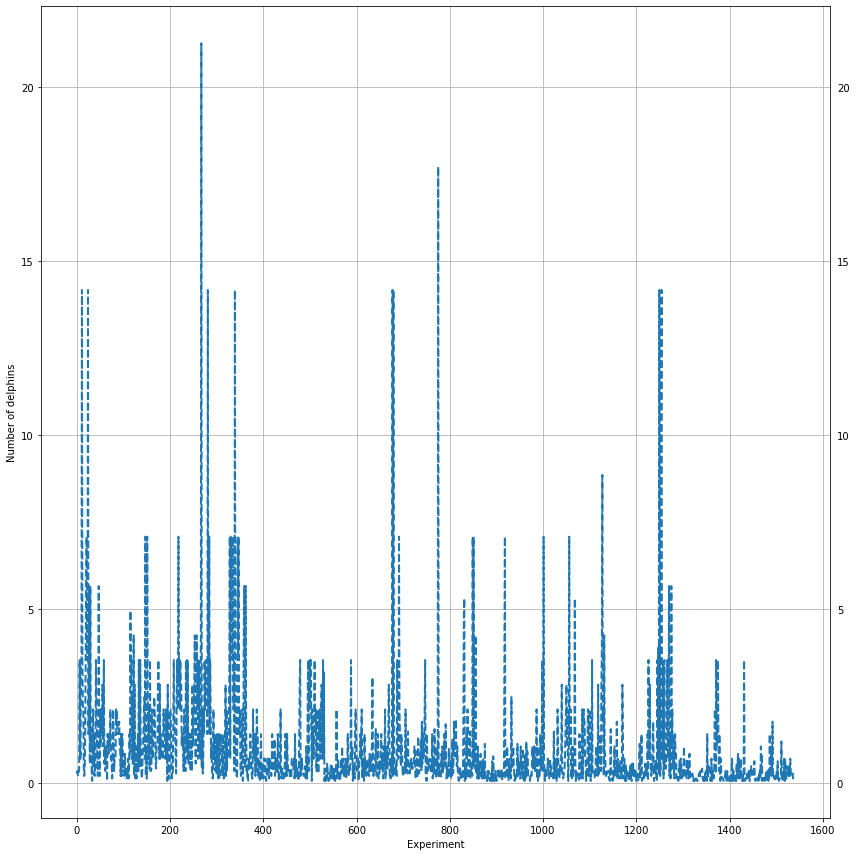

In [7]:
fig = plt.figure(figsize=(12,12))
plt.plot(nb_delphins, linestyle='dashed', linewidth=2)
plt.tick_params(labelright=True)
plt.grid(True) 
plt.xlabel('Experiment',fontsize=10)
plt.ylabel('Number of delphins',fontsize=10)                                                                                                                                                
plt.tight_layout()

In [181]:
def hist_estimate(data, m):
    data_normalized = data / np.max(data)  #normalisation des données 
    
    h = 1/m 
    n=len(data)
    hist=[]
    
    for i in range(1,m+1):
        count = 0
        for k in range(n) :    #comptage du nombre de Xi dans chaque intervalle Ai 
            if (data_normalized[k] >= (i-1)/m) and (data_normalized[k] < i/m) :
                count += 1
        hist.append(count)
        
    return([i*1/((max(data) - min(data))*n*h) for i in hist])

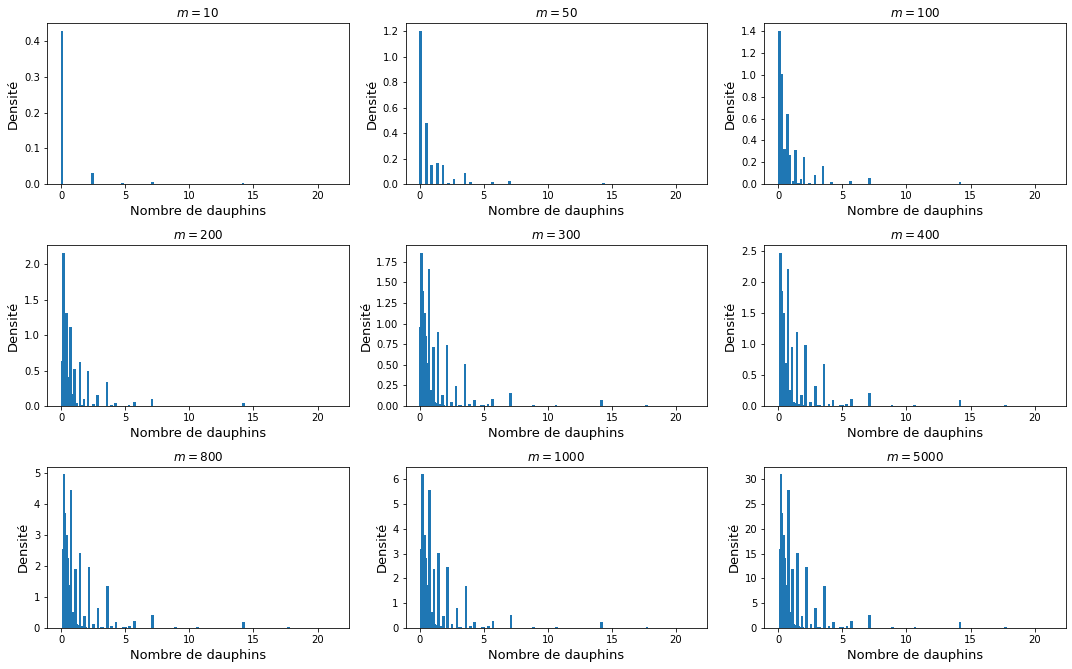

In [195]:
#affichage de hist_estimate pour différentes valeurs de m stockée dans la liste list_m 

list_m = [10,50,100,200,300,400,800,1000,5000] 

fig = plt.figure(figsize=(15,12))
for i in range(len(list_m)) : 
    

    plt.subplot(4,3,i+1)
    x = np.linspace(min(nb_delphins), max(nb_delphins), num=list_m[i])
    y = hist_estimate(nb_delphins,list_m[i])
    plt.bar(x,y,width=0.2)
    plt.xlabel('Nombre de dauphins',fontsize=13)
    plt.ylabel('Densité', fontsize=13)
    plt.title(f"$m = {round(list_m[i],3)}$")
    plt.tight_layout(rect=[0,0,1,1])
    

#### <font color=darkred>Estimateus à base de noyaux</font>

La densité $p_{\star}$ est estimée par l'estimateur à noyau suivant :

$$
\widehat{p}^{h_n}_n:x\mapsto \frac{1}{nh_n}\sum_{i=1}^n K\left(\frac{X_i-x}{h_n}\right)\,.
$$

où $K:\mathbb{R}\to \mathbb{R}$ est une fonction positive telle que $\int_{\mathbb{R}}K(x) dx = 1$ et où $h_n$ est un réel strictement positif.

In [152]:
def kernel_estimate(data, h, K):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    h: fenêtre de l'estimateur.
    K: noyau utilisé
    
    Outputs
    -------
    kest: fonction retournant l'estimation de la densité pour chaque x donné en argument.
    """
    data_normalized = data #/ np.max(data)
    n=len(data)
    return (lambda x: np.sum(K((data_normalized-x)/h))/(h*n) )

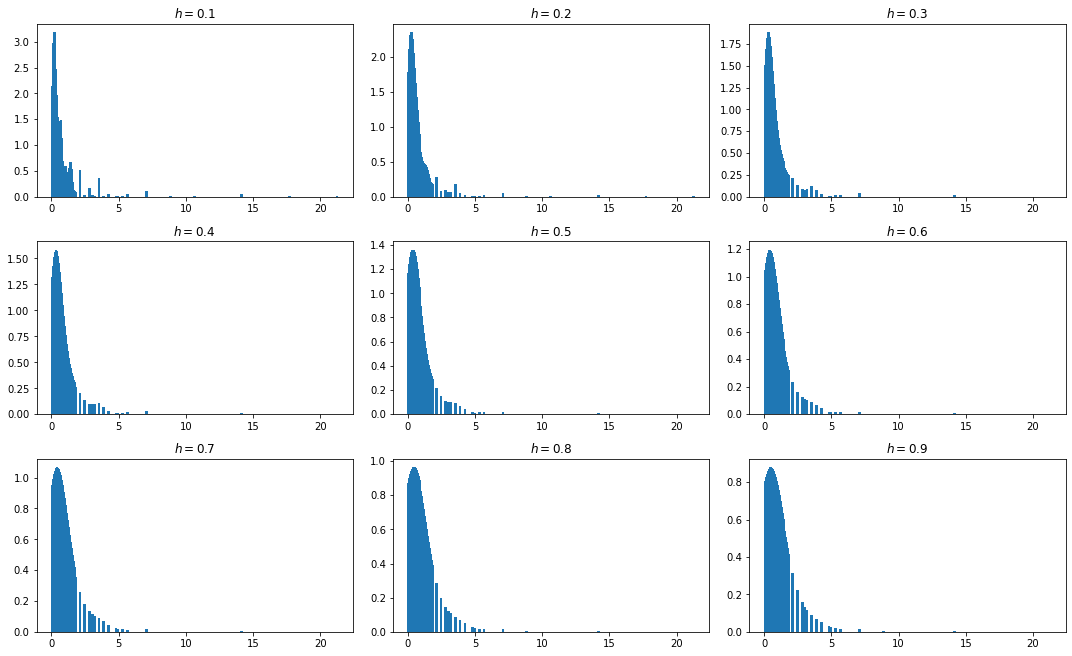

In [193]:
###
# Tracé de l'estimateur pour différentes valeurs de h.
###

# Noyau gaussien 
def K(x) :
    return np.exp(-(x**2)/2)

fig = plt.figure(figsize=(15,12))
list_h = [0.1*i for i in range(1,10)]  #liste des valeurs de h 

for i in range(len(list_h)) :
    plt.subplot(4,3,i+1)
    k_est = [kernel_estimate(nb_delphins, list_h[i], K)(x) for x in nb_delphins]
    plt.bar(nb_delphins, k_est, width=0.2)
    plt.title(f"$h = {round(list_h[i],3)}$")
    plt.tight_layout(rect = [0,0,1,1])

On remarque que l'estimateur proposé dépend très fortement du choix de $h_n$ donc la valeur optimale dépend de constates inconnues. Une façon de choisir $h_n$ automatiquement est de minimiser un estimateur de l'erreur quadratique moyenne intégrée. Remarquons que 

$$
\overline{\mathcal{E}} = \mathbb{E}\left[\int_0^1\left(\widehat{p}^h_n(x)-p_{\star}(x)\right)^2 dx\right] = \int_0^1 p^2_{\star}(x)dx + \mathbb{E}\left[\int_0^1 (\widehat{p}^h_n(x))^2dx\right] - 2\int_0^1 p_{\star}(x)\mathbb{E}\left[\widehat{p}^h_n(x)\right]dx\,.
$$

Minimiser $\overline{\mathcal{E}}$ en fonction de $h$ est donc équivalent à minimiser $h \mapsto \mathbb{E}\left[\int_0^1 (\widehat{p}^h_n(x))^2dx\right] - 2\int_0^1 p_{\star}(x)\mathbb{E}\left[\widehat{p}^h_n(x)\right]dx$. Cette quantité étant inconnue, nous proposons de minimiser un estimateur sans biais de cette dernière.

<font color=darkblue> un tel estimateur sans biais est donné par :

$$
\int_0^1 (\widehat{p}^h_n(x))^2dx - \frac{2}{n(n-1)h}\sum_{i=1}^n\sum_{j=1, j\neq i }^{n} K\left(\frac{X_i-X_j}{h}\right)\,.
$$
</font>

In [199]:
def integrated_MSE_estimate(data, h):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    h: fenêtre de l'estimateur.
    
    Outputs
    -------
    integrated_MSE: estimateur dans biais défini en question Q4.
    """
    
    n=len(data)
    
    #calcul de l'intégrale 
    xmin=0
    xmax=1
    fct = lambda y : kernel_estimate(data,h,K)(y)**2
    p1 = quad(fct,xmin,xmax)[0]
    
    #calcul de la double somme de l'estimateur 
    sum=0
    for i in range(n) : 
        for j in range(n) :
            if j!=i :
                sum += K((data[i]-data[j])/h)
    p2 = sum * 2/(n*(n-1)*h)
    
    integrated_MSE = p1 - p2
    
    return integrated_MSE

In [133]:
def optimize_bandwith(data,liste_h):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    range_h: np.array contenant les valeurs possibles pour h
    
    Outputs
    -------
    h_opt: h optimal parmi range_h.
    """
    liste_mse = [integrated_MSE_estimate(data,h) for h in liste_h]
    hn_opt_indice = np.argmax(liste_mse)
    
    return liste_h[hn_opt_indice]

Text(0, 0.5, 'Densité ')

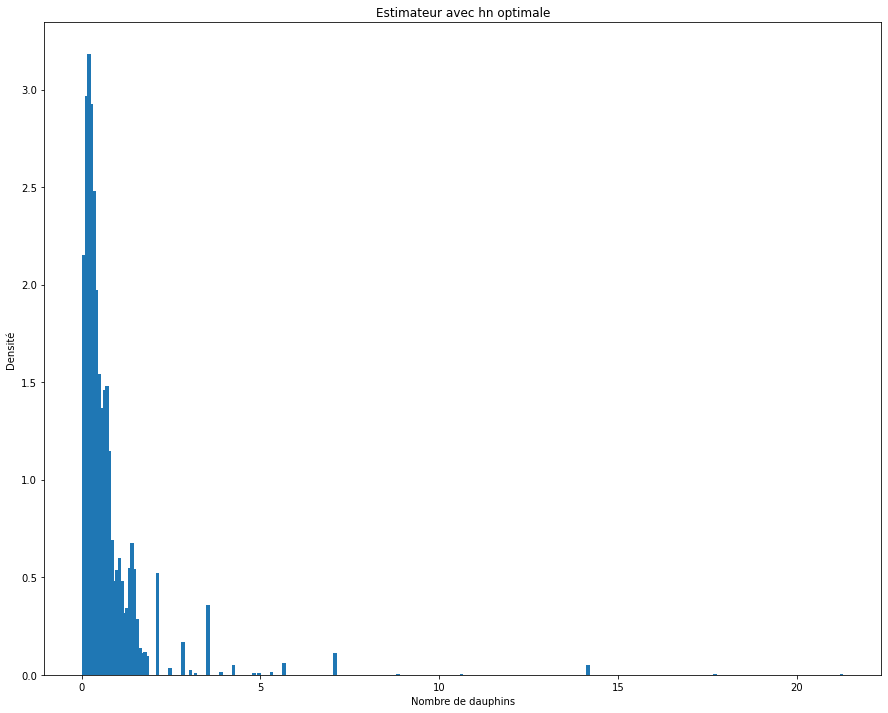

In [215]:
###
# Tracé de l'estimateur obtenu avec la fenêtre optimale
###
h_opt_list = [0.05*k for k in range(1,10)]
h_optimale = optimize_bandwith(nb_delphins,h_opt_list)

fig = plt.figure(figsize=(15,12))

k_est = [kernel_estimate(nb_delphins, h_optimale, K)(x) for x in nb_delphins]
plt.bar(nb_delphins, k_est, width=0.1)
plt.title("Estimateur avec hn optimale")
plt.xlabel("Nombre de dauphins")
plt.ylabel("Densité ")

In [216]:
h_optimale

0.1